In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [75]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/gnapoles/data-mining-course/main/sonar.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [52]:
data = df.values
data.shape
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape, data.shape)

(208, 60) (208,) (208, 61)


In [53]:
cv_results = cross_validate(RandomForestClassifier(random_state=42), X, y, cv=3)

test_score = cv_results['test_score']
ave_score = sum(test_score)/len(test_score)
print('Baseline score:' + str(round(ave_score,2)))

Baseline score:0.63


In [77]:
param_grid = {'n_estimators': [100, 500, 1000], 'max_features': [None, 'sqrt','log2'], 'criterion':['gini','entropy']}

In [78]:
grid = GridSearchCV(RandomForestClassifier(random_state=4), param_grid, cv=3, refit=True, verbose=1)
grid.fit(X,y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [100, 500, 1000]},
             verbose=1)

In [79]:
print(grid.best_estimator_)
print('best score: ' + str(round(grid.best_score_,2)))

RandomForestClassifier(max_features=None, n_estimators=500, random_state=4)
best score: 0.65


In [83]:
def plot_tuning_results(df):
    
    df_temp = df[df.max_features != 'sqrt'].sort_values(by=['n_estimators', 'criterion'])
    df_none = df_temp[df_temp.max_features != 'log2'].sort_values(by=['n_estimators','criterion'])
    df_sqrt = df[df.max_features == 'sqrt'].sort_values(by=['n_estimators', 'criterion'])
    df_log2 = df[df.max_features == 'sqrt'].sort_values(by=['n_estimators', 'criterion'])
    
    pivot1 = df_none.pivot_table(index='n_estimators', columns='criterion', values='accuracy')
    pivot2 = df_sqrt.pivot_table(index='n_estimators', columns='criterion', values='accuracy')
    pivot3 = df_log2.pivot_table(index='n_estimators', columns='criterion', values='accuracy')
    
                                 
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))
    
    sns.heatmap(pivot1,vmin=0.45,vmax=0.65,annot=True,linewidths=0.4,ax=ax1,cmap="coolwarm_r")
    sns.heatmap(pivot2,vmin=0.45,vmax=0.65,annot=True,linewidths=0.4,ax=ax2,cmap="coolwarm_r")
    sns.heatmap(pivot3,vmin=0.45,vmax=0.65,annot=True,linewidths=0.4,ax=ax3,cmap="coolwarm_r")
    
    ax1.set_title("max_features: none")
    ax3.set_title("max_features: log2")
    ax2.set_title("max_features: sqrt")

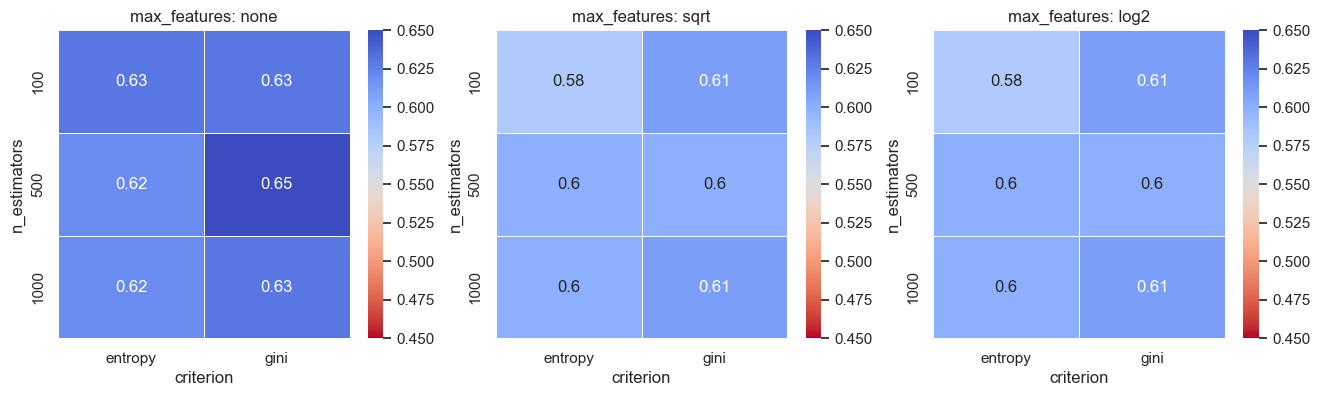

In [84]:
df_grid = pd.DataFrame(grid.cv_results_["params"])
df_grid['accuracy'] = np.round(grid.cv_results_["mean_test_score"],2)
plot_tuning_results(df_grid)

In [85]:
random  =RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_iter=15, refit=True,
                           random_state=31, verbose=1)
random.fit(X,y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=15,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'n_estimators': [100, 500, 1000]},
                   random_state=31, verbose=1)

In [86]:
print(random.best_estimator_)
print("best_Score:" + str(round(random.best_score_,2)))

RandomForestClassifier(max_features=None, random_state=42)
best_Score:0.66


/Users/mertturhan/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/Users/mertturhan/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


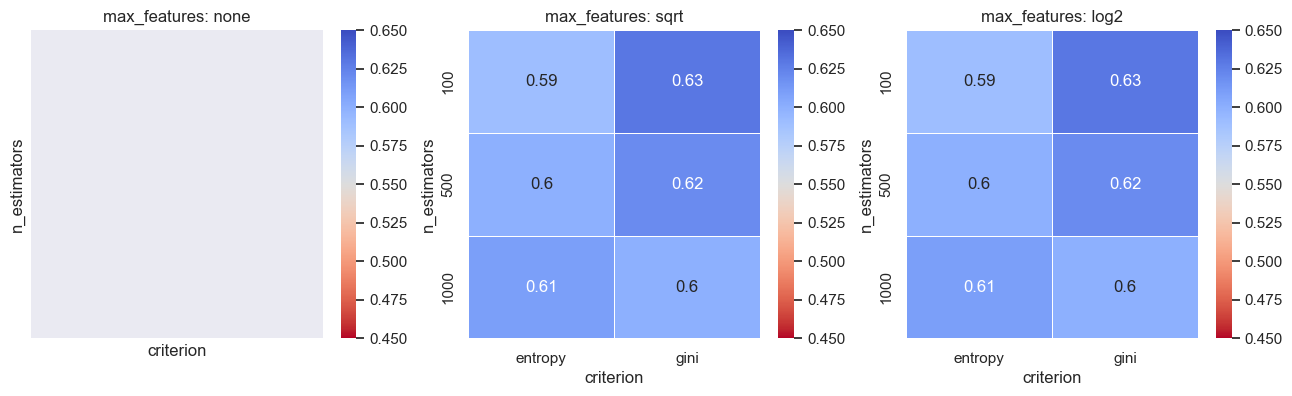

In [65]:
df_Random = pd.DataFrame(random.cv_results_['params'])
df_Random['accuracy']=np.round(random.cv_results_['mean_test_score'],2)
plot_tuning_results(df_Random)

In [66]:
df_grid

,criterion,max_features,n_estimators,accuracy
0,gini,None,100,NaN
1,gini,None,500,NaN
2,gini,None,1000,NaN
3,gini,sqrt,100,0.61
4,gini,sqrt,500,0.60
5,gini,sqrt,1000,0.61
6,gini,log2,100,0.59
7,gini,log2,500,0.60
8,gini,log2,1000,0.60
9,entropy,None,100,NaN
